In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

In [15]:
from ln_utils import *

In [4]:
%matplotlib inline

# Parameters

In [5]:
time_window = 86400*7
#weight = None
weight = "capacity"

In [6]:
MIN_TIME = 1547082001 #Thursday, January 10, 2019 1:00:01 AM
MAX_TIME = 1553947199 # Saturday, March 30, 2019 11:59:59 AM

# Load temporal data

In [7]:
edges = pd.read_csv("../LNdata/edge_last_updates.csv")

In [8]:
edges["last_update"].hist(bins=50)

# Analyzing graph snapshots

### Snapshots with the number of edges

In [9]:
snaphots = get_snapshots(edges, MIN_TIME, MAX_TIME, with_data=True, time_window=time_window)

TMP = nx.Graph()
TMP.add_edges_from(snaphots[0])

%%time
comm = nx.communicability_betweenness_centrality(TMP)

%%time
betw = nx.betweenness_centrality(TMP)

%%time
betw = nx.betweenness_centrality(TMP)

### Calculate centralities for snapshots

# TODO: several betweeness version:
- [current flow](https://networkx.github.io/documentation/networkx-2.2/reference/algorithms/generated/networkx.algorithms.centrality.current_flow_betweenness_centrality.html#networkx.algorithms.centrality.current_flow_betweenness_centrality)
- [communicability](https://networkx.github.io/documentation/networkx-2.2/reference/algorithms/generated/networkx.algorithms.centrality.communicability_betweenness_centrality.html#networkx.algorithms.centrality.communicability_betweenness_centrality)
- [percolation centrality](https://networkx.github.io/documentation/networkx-2.2/reference/algorithms/generated/networkx.algorithms.centrality.percolation_centrality.html#networkx.algorithms.centrality.percolation_centrality)

In [10]:
stats = get_snapshot_properties(snaphots, weight=weight)

for idx, snap_stat in enumerate(stats):
    snap_stat.to_csv("stat_%i.csv" % idx, index=False)

# Correlation time series

In [11]:
results = dict([(corr, get_corr_sequence(stats, corr)) for corr in ["pearson","spearman","kendall","w_kendall"]])

### Correlation of centrality measures on adjacent days

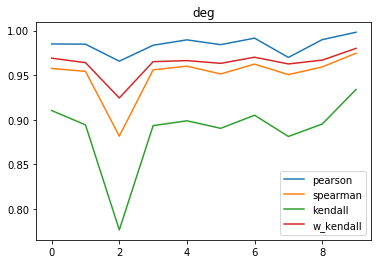

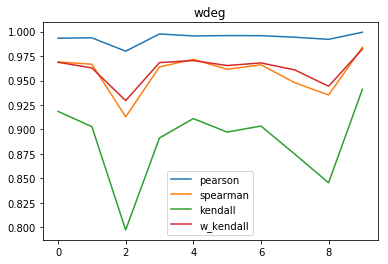

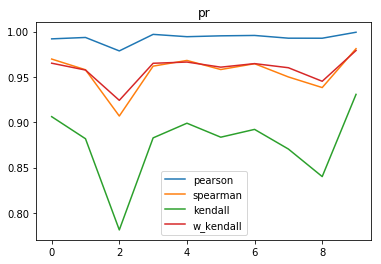

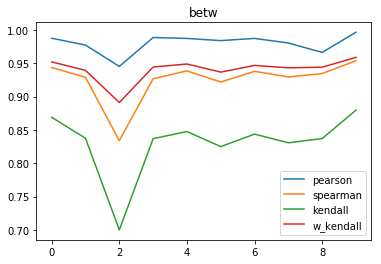

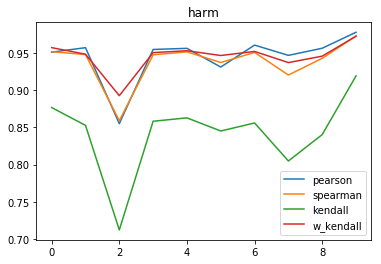

In [14]:
for cent in  ["deg","wdeg","pr","betw","harm"]:
    show_corr_results(results, cent)